In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as numpy

In [3]:
import cv2

In [4]:
 import os.path

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [6]:
from pathlib import Path

In [7]:
from sklearn.metrics import confusion_matrix

In [8]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [10]:
data_dir = 'Segmented Medicinal Leaf Images'

In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        

In [12]:
tf.keras.utils.image_dataset_from_directory('Segmented Medicinal Leaf Images',batch_size= 8,image_size=(128,128))

Found 2497 files belonging to 30 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
data=tf.keras.utils.image_dataset_from_directory('Segmented Medicinal Leaf Images')
data

Found 2497 files belonging to 30 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [15]:
batch=data_iterator.next()
batch[0].shape

(32, 256, 256, 3)

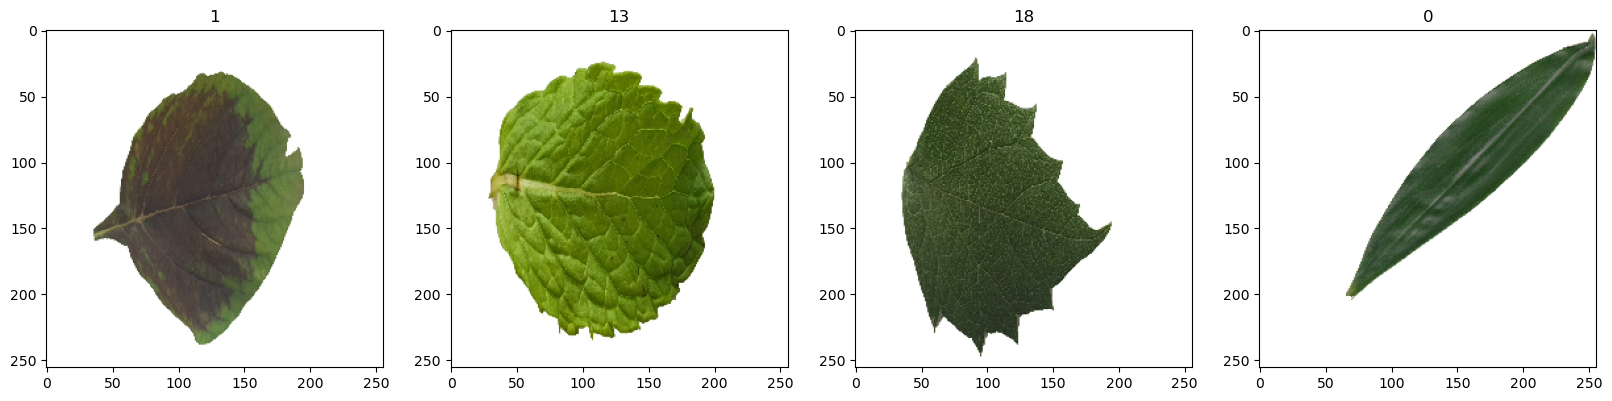

In [16]:
fig,ax =plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [17]:
data= data.map(lambda x,y:(x/255,y))
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
type(data)

tensorflow.python.data.ops.map_op._MapDataset

In [19]:
scaled_iterator=data.as_numpy_iterator()

In [20]:
batch=scaled_iterator.next()

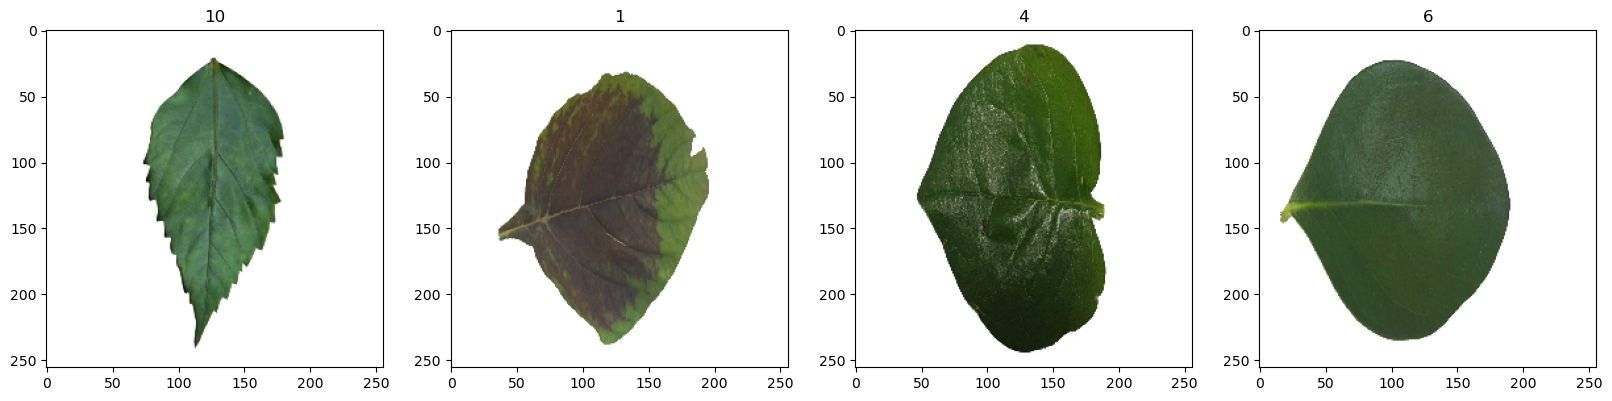

In [21]:
fig,ax =plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [22]:
len(data)

79

In [23]:
train_size=int(len(data)*0.7)
val_size=int(len(data)*0.2)
test_size=int(len(data)*0.1)+1

In [24]:
test_size

8

In [25]:
val_size

15

In [26]:
train_size

55

In [27]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [28]:
len(train)

55

In [29]:
len(val)

15

In [30]:
len(test)

8

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [32]:
model = Sequential()

In [33]:
model.add(Conv2D(32,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(30,activation='softmax'))



In [34]:
model.compile(optimizer = 'adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [36]:
logdir = 'logs'

In [37]:
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir=logdir)

model.compile

In [38]:
hist = model.fit(train,epochs=30,validation_data=val, callbacks=[tensorboard_callbacks])

Epoch 1/30


55/55 [==============================] - 319s 6s/step - loss: 3.3720 - accuracy: 0.1489 - val_loss: 1.7848 - val_accuracy: 0.5292
Epoch 2/30
55/55 [==============================] - 692s 13s/step - loss: 1.5949 - accuracy: 0.5443 - val_loss: 0.9373 - val_accuracy: 0.7417
Epoch 3/30
55/55 [==============================] - 424s 8s/step - loss: 0.9268 - accuracy: 0.7284 - val_loss: 0.6684 - val_accuracy: 0.8042
Epoch 4/30
55/55 [==============================] - 195s 3s/step - loss: 0.5964 - accuracy: 0.8170 - val_loss: 0.5323 - val_accuracy: 0.8708
Epoch 5/30
55/55 [==============================] - 167s 3s/step - loss: 0.4630 - accuracy: 0.8500 - val_loss: 0.4265 - val_accuracy: 0.8813
Epoch 6/30
55/55 [==============================] - 1947s 36s/step - loss: 0.4053 - accuracy: 0.8807 - val_loss: 0.4616 - val_accuracy: 0.8938
Epoch 7/30
55/55 [==============================] - 245s 4s/step - loss: 0.2565 - accuracy: 0.9216 - val_loss: 0.4009 - val_accuracy: 0.9083
Epoch 8/

In [39]:
results = model.evaluate(test, verbose=0)
print('Test loss: {:.5f}'.format(results[0]))
print('Test accuracy: {:.2f}'.format(results[1]*100))

Test loss: 0.45193
Test accuracy: 92.97


In [40]:
hist.history

{'loss': [3.371988534927368,
  1.594886064529419,
  0.9268192052841187,
  0.5964269638061523,
  0.46300768852233887,
  0.4053115248680115,
  0.25648248195648193,
  0.21902696788311005,
  0.15414860844612122,
  0.20997892320156097,
  0.13323649764060974,
  0.15655381977558136,
  0.10434573143720627,
  0.1009557694196701,
  0.06725839525461197,
  0.06334361433982849,
  0.05267712473869324,
  0.05255312845110893,
  0.06391251087188721,
  0.060980554670095444,
  0.03808741644024849,
  0.08477550745010376,
  0.11674102395772934,
  0.051446858793497086,
  0.0448167584836483,
  0.09526441991329193,
  0.0444832369685173,
  0.08665286749601364,
  0.0698993131518364,
  0.042558882385492325],
 'accuracy': [0.14886364340782166,
  0.5443181991577148,
  0.7284091114997864,
  0.8170454502105713,
  0.8500000238418579,
  0.8806818127632141,
  0.9215909242630005,
  0.9363636374473572,
  0.9511363506317139,
  0.9397727251052856,
  0.9573863744735718,
  0.9471591114997864,
  0.9647727012634277,
  0.967613

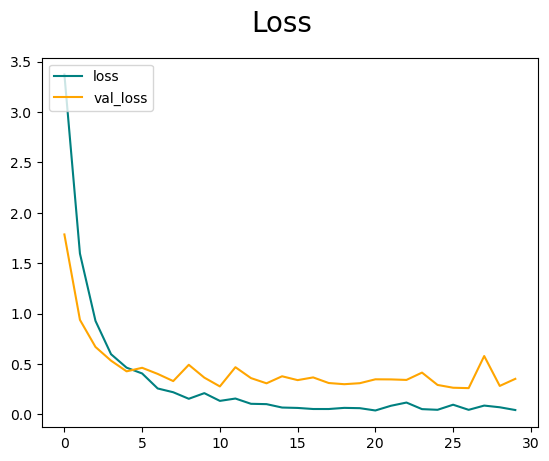

In [41]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal', label ='loss')
plt.plot(hist.history['val_loss'],color='orange', label ='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

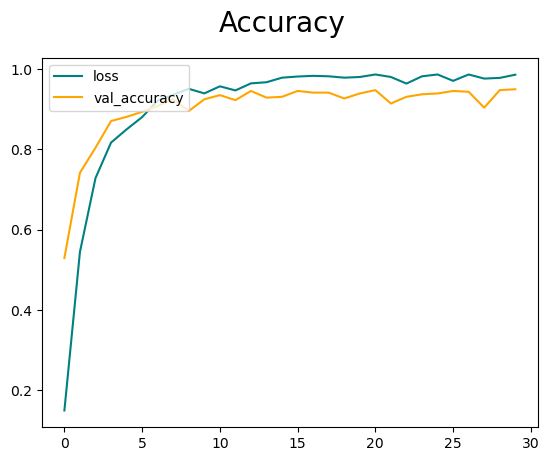

In [42]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal', label ='loss')
plt.plot(hist.history['val_accuracy'],color='orange', label ='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [43]:
class_labels = {0:'MedicinalPlant___Alpinia Galanga (Rasna)', 1:'MedicinalPlant___Amaranthus Viridis (Arive-Dantu)',
       2:'MedicinalPlant___Artocarpus Heterophyllus (Jackfruit)', 3:'MedicinalPlant___Azadirachta Indica (Neem)', 4:'MedicinalPlant___Basella Alba (Basale)',
       5:'MedicinalPlant__Brassica Juncea (Indian Mustard)',
       6:'MedicinalPlant_Carissa Carandas (Karanda)',
       7:'MedicinalPlant___Citrus Limon (Lemon)',
        8:'MedicinalPlant___Ficus Auriculata (Roxburgh fig)',
       9:'MedicinalPlant___Ficus Religiosa (Peepal Tree)',
        10:'MedicinalPlant_Hibiscus Rosa-sinensis',
               11:'MedicinalPlant_Jasminum (Jasmine)',
                12:'MedicinalPlant_Mangifera Indica (Mango)',
                13:'MedicinalPlant_Mentha (Mint)',
                14:'MedicinalPlant_Moringa Oleifera (Drumstick)',
                15:'MedicinalPlant_Muntingia Calabura (Jamaica Cherry-Gasagase)',
                16:'MedicinalPlant_Murraya Koenigii (Curry)',
                17:'MedicinalPlant_Nerium Oleander (Oleander)',
                18:'MedicinalPlant_Nyctanthes Arbor-tristis (Parijata)',
                19:'MedicinalPlant_Ocimum Tenuiflorum (Tulsi)',
                20:'MedicinalPlant_Piper Betle (Betel)',
                21:'MedicinalPlant_Plectranthus Amboinicus (Mexican Mint)',
                22:'MedicinalPlant_Pongamia Pinnata (Indian Beech)',
               23:'MedicinalPlant_Psidium Guajava (Guava)',
               24:'MedicinalPlant_Punica Granatum (Pomegranate)',
               25:'MedicinalPlant_Santalum Album (Sandalwood)',
               26:'MedicinalPlant_Syzygium Cumini (Jamun)',
               27:'MedicinalPlant_Syzygium Jambos (Rose Apple)',
               28:'MedicinalPlant_Tabernaemontana Divaricata (Crape Jasmine)',
               29:'MedicinalPlant_Trigonella Foenum-graecum (Fenugreek)',
               }
    

In [44]:
from PIL import Image

In [45]:
image = Image.open('AG-S-001.jpg')

In [46]:
import numpy as np
image = image.resize((256,256))
img_array = np.array(image)
img_array = img_array/255
img_array = np.expand_dims(img_array, axis=0)

In [47]:
predictions = model.predict(img_array)
class_idx = np.argmax(predictions)
predicted_label = class_labels[class_idx]
print(predicted_label)
for i in range(len(predictions)):
    predictions[i] = np.round(predictions[i], 2)
print(predictions)
print(np.sum(predictions))

1/1 [==============================] - 1s 998ms/step
MedicinalPlant___Alpinia Galanga (Rasna)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
1.0


In [48]:
def predict_my_image(img_name):
    image = Image.open(img_name)
    image = image.resize((256,256))
    img_array = np.array(image)
    img_array = img_array/255
    img_array = np.expand_dims(img_array, axis=0)
    
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions)
    predicted_label = class_labels[class_idx]
    for i in range(len(predictions[0])):
        predictions[0][i] = np.round(predictions[0][i], 3)
    print(predictions)
    print(predictions[0][19])
    print(predicted_label)

In [49]:
predict_my_image("OT-S-001.jpg")

1/1 [==============================] - 0s 47ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
1.0
MedicinalPlant_Ocimum Tenuiflorum (Tulsi)


In [50]:
predict_my_image('BJ-S-005-Copy1.jpg')

1/1 [==============================] - 0s 42ms/step
[[0.    0.    0.27  0.    0.    0.711 0.    0.    0.    0.    0.    0.
  0.017 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.001 0.   ]]
0.0
MedicinalPlant__Brassica Juncea (Indian Mustard)


In [51]:

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model to a file
with open('medicine.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmph10hngul\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmph10hngul\assets
